In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
from scipy import signal

In [5]:
grayImg = '../Images/albert-einstein_gray.jpg'
colorImg = '../Images/tulips.jpg'
affineWarped = '../Images/affine-transformed image.jpg'
binary = '../Images/binary.png'
sharp = '../Images/sharp.jpg'

I_gray = cv2.imread(grayImg, cv2.IMREAD_GRAYSCALE)
I_affineWarped = cv2.imread(affineWarped, cv2.IMREAD_GRAYSCALE)
I_BGR = cv2.imread(colorImg)
I_BGRGray = cv2.imread(colorImg, cv2.IMREAD_GRAYSCALE)
I_Binary = cv2.imread(binary, cv2.IMREAD_GRAYSCALE)
I_sharp = cv2.imread(sharp)

# Image Blurring

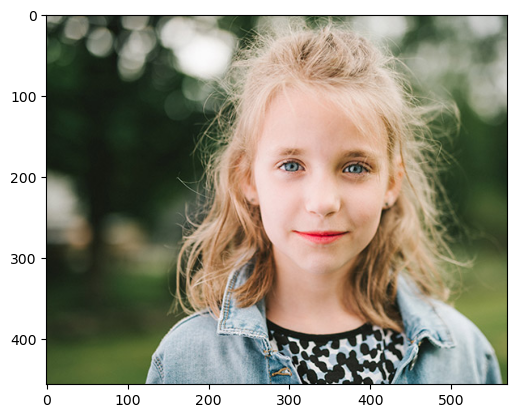

In [7]:
plt.imshow(I_sharp[:,:,::-1])

In [9]:
graySharp = cv2.cvtColor(I_sharp, cv2.COLOR_RGB2GRAY)

In [11]:
smoothingMask = np.ones((15,15))/225

In [12]:
imBlurred = signal.convolve2d(graySharp,smoothingMask,boundary='symm',mode='same')

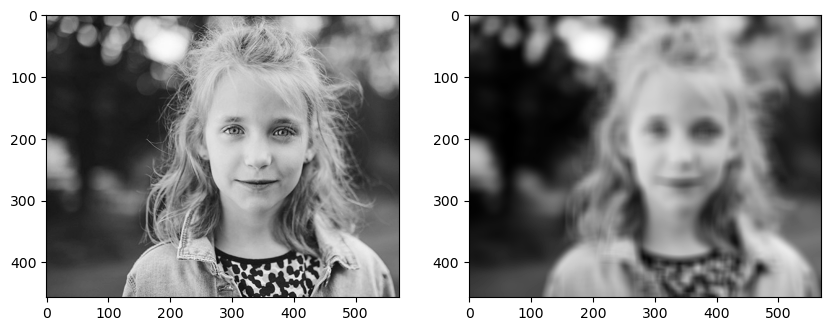

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(graySharp,cmap='gray')
ax2.imshow(imBlurred,cmap='gray')

In [16]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

In [35]:
fx = signal.convolve2d(graySharp,xMask,boundary='symm',mode='same')
fy = signal.convolve2d(graySharp,yMask,boundary='symm',mode='same')

In [36]:
Gm = (fx**2 + fy**2)**.05

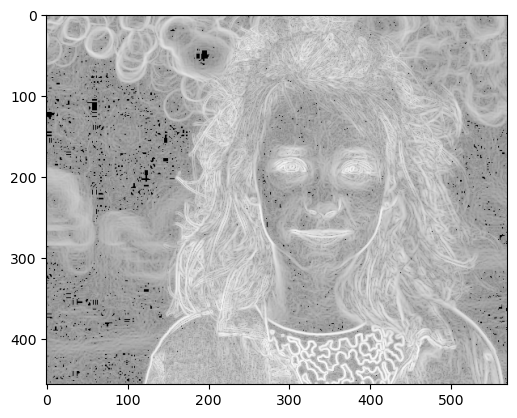

In [20]:
plt.imshow(Gm,cmap='gray')

In [25]:
th = Gm.max()-2*Gm.std()
th

1.494508813200188

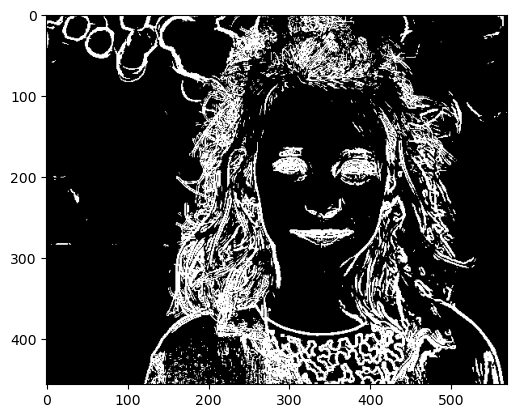

In [26]:
E = Gm>th
plt.imshow(E,cmap='gray')

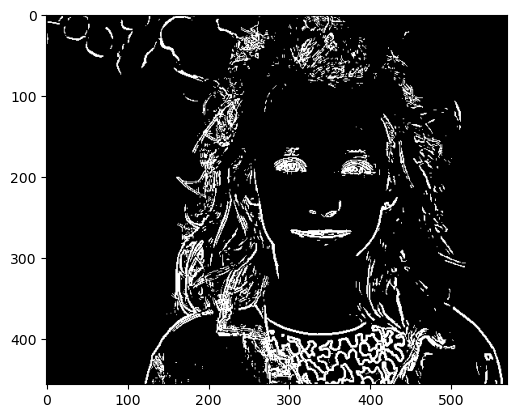

In [32]:
E = Gm>1.58
plt.imshow(E,cmap='gray')

In [50]:
smoothingMask = np.ones((5,5))/25
imBlurred = signal.convolve2d(graySharp,smoothingMask,boundary='symm',mode='same')
imSharped = imBlurred + 50*Gm

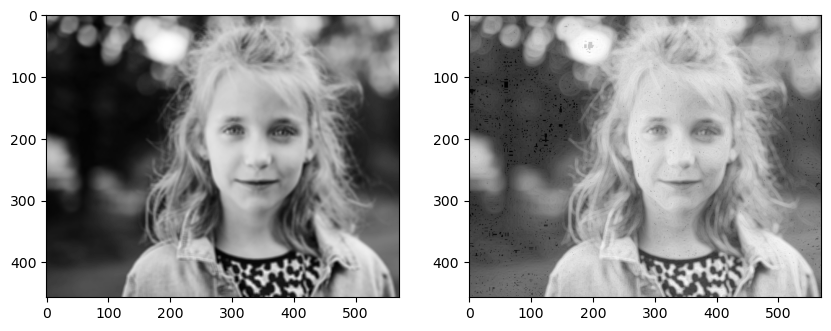

In [51]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imBlurred,cmap='gray')
ax2.imshow(imSharped,cmap='gray')